# TensorFlores - Example 01

## 1. Importing libraries

In [51]:
import sys, os
path = os.getcwd().split('\\examples')[0]
sys.path.append(path)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflores.models.multilayer_perceptron import MultilayerPerceptron

## 2. Load Dataset

In [53]:
df = pd.read_csv(path + '\\data\\emission_total.csv')
df.head(5)

,CO2 (g/s) [estimated maf],CO2 (g/s) [maf],estimated_maf,intake_pressure,intake_temperature,latitude,longitude,maf,rpm,speed
0,0.809921,0.639659,3.798529,26.0,54.0,-5.793477,-35.198093,3.0,1568.0,43.0
1,1.796942,2.132196,8.427658,57.0,53.0,-5.793538,-35.198116,10.0,1582.0,43.0
2,2.199995,2.132196,10.317979,69.0,53.0,-5.793600,-35.198139,10.0,1600.0,43.0
3,1.226761,0.639659,5.753511,38.0,54.0,-5.793665,-35.198170,3.0,1625.0,44.0
4,0.756202,0.426439,3.546585,24.0,54.0,-5.793739,-35.198196,2.0,1586.0,45.0


In [54]:
scaler = MinMaxScaler()

In [55]:
values_df = scaler.fit_transform(df[['intake_pressure', 'intake_temperature', 'speed', 'CO2 (g/s) [maf]']])

In [56]:
X = values_df[:,0:3]
y = values_df[:,3:]

## 3. Splitting the data

In [57]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## 4. Define the model

### 4.1 Define hidden layers and neurons

In [59]:
hidden_layer_sizes = [16, 8]             

### 4.2 Define activaction functions

In [60]:
activation_functions = ['relu', # Hidden layer (16 neurons)
                        'relu', # Hidden layer (8 neurons)
                       'linear'] # Output layer (8 neurons)

### 4.3 Define input and output size

In [61]:
input_size = X.shape[1]
output_size = y.shape[1]

### 4.4 Disable quantization-aware training

In [62]:
training_with_quantization = False

### 4.5 Define the type of weight and bias initialisation

In [63]:
weight_bias_init = 'RandomNormal'

### 4.6 Create the TensorFlores class

In [64]:
nn = MultilayerPerceptron()

In [ ]:
nn = MultilayerPerceptron(input_size = input_size,
                            hidden_layer_sizes = hidden_layer_sizes,
                            output_size = output_size ,
                            activation_functions = activation_functions,
                            weight_bias_init = weight_bias_init,
                            training_with_quantization = training_with_quantization)


### 4.7 Define training epochs

In [66]:
epochs =  100

### 4.8 Define the batch size

In [67]:
batch_size = 36

### 4.9 Define the loss function

- 'mean_squared_error'
- 'cross_entropy'
- 'mean_absolute_error'
- 'binary_cross_entropy'

In [68]:
loss_function = 'mean_squared_error'

### 4.10 Define the optimizer

- 'sgd'
- 'adam'
- 'adamax'

In [69]:
optimizer = 'adamax'

In [70]:
nn.train(X = X_train, 
         y = y_train,
         epochs = epochs, 
         learning_rate = 0.0001,
         loss_function=loss_function, 
         optimizer=optimizer, 
         batch_size=batch_size, 
         validation_split = 0.2)

Epoch 1/100, Loss: 4.980334507028221, Val Loss: 6.068478669945784
Epoch 2/100, Loss: 6.449942856171793, Val Loss: 5.765686621670924
Epoch 3/100, Loss: 5.202196986127552, Val Loss: 5.471448067207313
Epoch 4/100, Loss: 4.755974351431409, Val Loss: 5.1856358715448705
Epoch 5/100, Loss: 4.889328812304896, Val Loss: 4.908327858315233
Epoch 6/100, Loss: 4.444049816653745, Val Loss: 4.639351104017617
Epoch 7/100, Loss: 3.3039428346388684, Val Loss: 4.378847661942551
Epoch 8/100, Loss: 4.146735264920364, Val Loss: 4.1267656130942
Epoch 9/100, Loss: 4.416974011952309, Val Loss: 3.8830652514162654
Epoch 10/100, Loss: 2.748770914241069, Val Loss: 3.6477215033569124
Epoch 11/100, Loss: 4.294589447450711, Val Loss: 3.420754844547108
Epoch 12/100, Loss: 3.1497526600951353, Val Loss: 3.2022177489759858
Epoch 13/100, Loss: 3.390535671956125, Val Loss: 2.992168491826669
Epoch 14/100, Loss: 3.1810968476160455, Val Loss: 2.790303508037892
Epoch 15/100, Loss: 3.3010936094745973, Val Loss: 2.59654537597706

In [71]:
error = nn.predict(X_test) - y_test

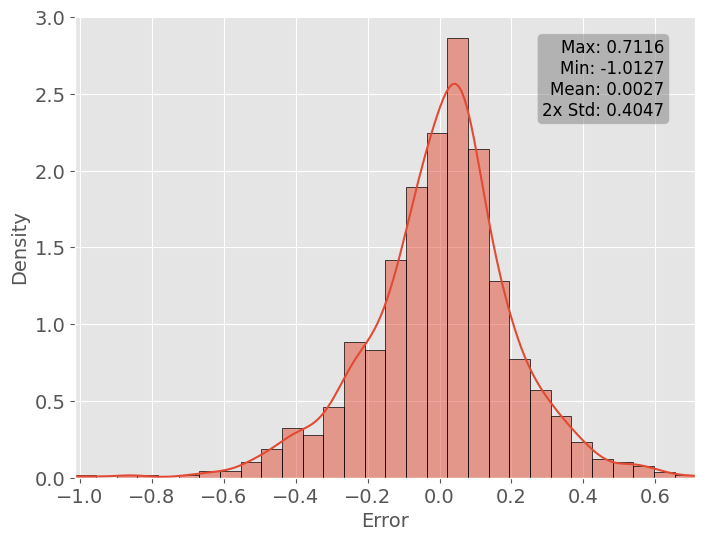

In [72]:
# Estatísticas
error_mean = np.mean(error)
error_std = np.std(error)
error_max = np.max(error)
error_min = np.min(error)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Estilo do gráfico
plt.style.use('ggplot')

# Plotando histograma com KDE (Densidade) sem legenda
sns.histplot(error, bins=30, color='coral', edgecolor='black', stat="density", kde=True, legend=False, ax=ax)

# Configuração dos eixos
ax.set_xlabel('Error', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
#ax.set_title('Error Distribution', fontsize=15)
ax.tick_params(labelsize=14)
ax.grid(True)

# Definindo limites do eixo X
ax.set_xlim(error_min, error_max)

# Exibir os valores estatísticos no gráfico
textstr = '\n'.join((
    f'Max: {error_max:.4f}',
    f'Min: {error_min:.4f}',
    f'Mean: {error_mean:.4f}',
    f'2x Std: {2 * error_std:.4f}'
))
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.savefig('./figures/example_01.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
# Exibir gráfico
plt.show()

### 4.11 Save model as C++

In [73]:
nn.save_model_as_cpp('./tensorflores_without_quant')

Model C++ saved!


### 4.12 Save model as json

In [74]:
nn.save_model_as_json('./tensorflores_without_quant')

Model saved successfully as './tensorflores_without_quant.json'!


### 4.12 Load model from json

In [75]:
json_data = nn.load_json_model('./tensorflores_without_quant')
json_data

Successfully loaded JSON file: ./tensorflores_without_quant.json


{'model_quantized': False,
 'num_layers': 3,
 'layers': [{'activation': 'relu',
   'weights': [[0.25130431662396613,
     -1.2147914404241322,
     -0.2884391170139249,
     0.8606677711806703,
     1.5018800063241295,
     1.457068347654409,
     2.485611518934096,
     -0.2194694221104431,
     1.44672478778409,
     -0.036373508158682274,
     -2.7866812544379806,
     -0.5462811108638331,
     0.5005394347543287,
     0.046451653299363044,
     -1.241076380766991,
     0.24541163169106964],
    [0.7360947147160628,
     -0.22909043202182777,
     -0.02888562950803397,
     1.4740145700748322,
     -0.972825532772787,
     1.1031430486796638,
     -0.8224112838985033,
     -0.4990274814217257,
     0.038942922605802455,
     1.3026129213060025,
     -0.977868792905857,
     0.19823389720251328,
     -1.0935966078970152,
     1.2092028471045888,
     -0.7700673867395008,
     0.24021322746849333],
    [1.1378215866161998,
     0.008643173246605705,
     -0.6594804193082676,
     0.01